<a href="https://colab.research.google.com/github/yeowooncheon/big-data/blob/main/%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#3장 연습문제 1번
import math


In [11]:
#3장 연습문제 1-1번 거리 구하기

def distance(x1, y1, x2, y2):
    result = math.sqrt( math.pow(x1 - x2, 2) + math.pow(y1 - y2, 2))
    return result

In [12]:
P1 = (13,19)
P2 = (10,15)


In [13]:
d = distance(P1[0], P1[1], P2[0], P2[1])

print(d)


5.0


In [14]:
def add(a,b):
  print(a+b)


In [15]:
add(3**2,4**2)

25


In [16]:
#군집 1 WSS
add(5**2,25)

50


In [17]:
#군집 2 WSS
add(4**2,4**2)

32


In [18]:
#TWSS
add(50,32)

82


In [19]:
#1-3번 엘보우 포인트가 4 지점 이니까 군집의 수는 4개로 정하면 됩니다.



In [20]:
# 2-1 연습문제


In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data = np.array([[1, 4], [4, 2], 
                [3, 7], [6, 1],
                [2, 5]]) 
data


array([[1, 4],
       [4, 2],
       [3, 7],
       [6, 1],
       [2, 5]])

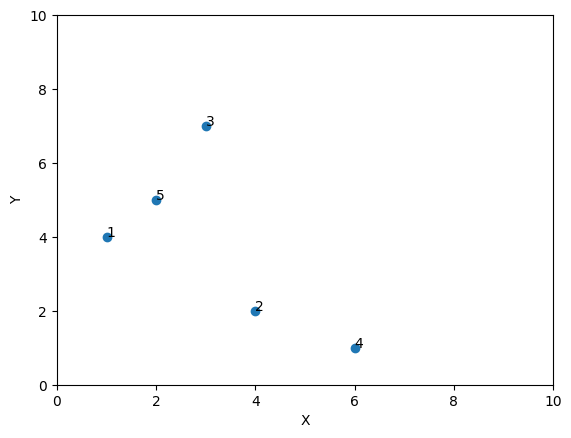

In [23]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 10)
plt.ylim(0, 10)
rows, columns = data.shape
for i in range(rows):
  plt.annotate(i+1, (data[i,0], data[i,1]))

In [24]:
#편차 표준화
scaler = StandardScaler()
scaler.fit(data) 
data_std = scaler.transform(data)
print(data_std)

[[-1.27872403  0.09365858]
 [ 0.46499055 -0.84292723]
 [-0.11624764  1.4985373 ]
 [ 1.62746694 -1.31122014]
 [-0.69748583  0.56195149]]


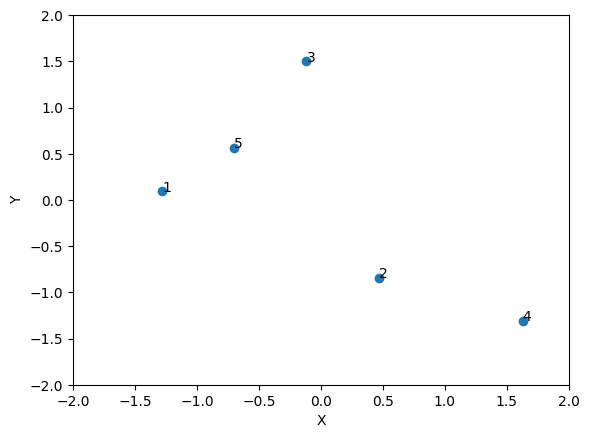

In [25]:
# 표준화 데이터의 X, Y의 산포도  
plt.scatter(data_std[:,0], data_std[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# 행과 열의 수
rows, columns = data_std.shape
# 데이터 라벨 
for i in range(rows):
  plt.annotate(i+1, (data_std[i,0], data_std[i,1]))  

In [26]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_std) 
#군집 할당
print(kmeans.labels_)
#군집 중심
print(kmeans.cluster_centers_)

[0 1 0 1 0]
[[-0.69748583  0.71804912]
 [ 1.04622875 -1.07707368]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


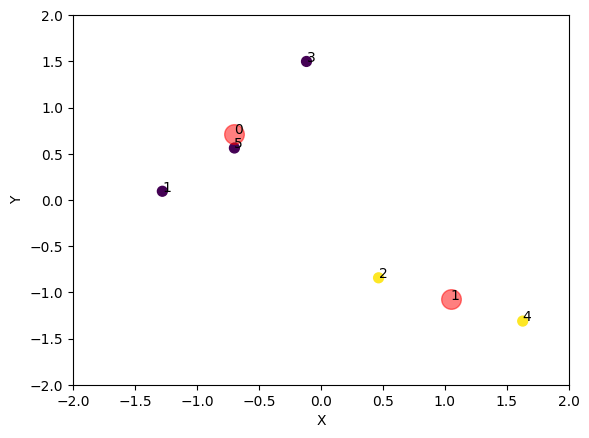

In [53]:
# 결과 분석
# 군집 데이터 분포 
plt.scatter(data_std[:,0], data_std[:,1], c=kmeans.labels_, s=50)
# plt.title('X와 Y에 대한 분포: 표준화')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# 행과 열의 수
rows, columns = data_std.shape

# 데이터 라벨
for i in range(rows):
  plt.annotate(i+1, (data_std[i,0], data_std[i,1]))  

# 군집 중심 표시 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            c='red', s=200, alpha=0.5);
# 군집 라벨 
for k in range(columns):
  plt.annotate(k, 
              (kmeans.cluster_centers_[k, 0], kmeans.cluster_centers_[k, 1]))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

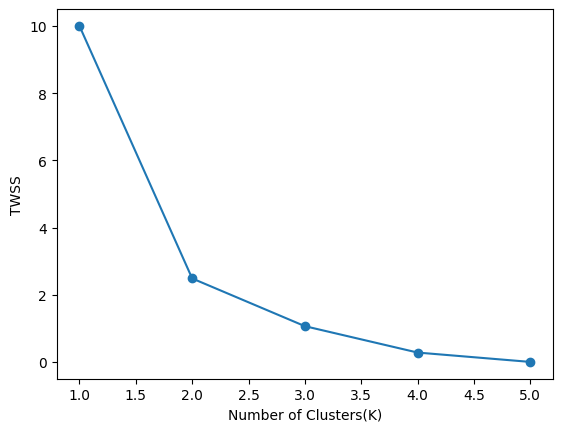

In [27]:
TWSS = {}
for k in range(1, 6):  
  model = KMeans(n_clusters=k)
  model.fit(data_std) 
  TWSS[k] = model.inertia_
plt.plot(list(TWSS.keys()), list(TWSS.values()), marker='o')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("TWSS")
plt.show()


In [54]:
#군집 중심과의 거리

In [55]:
P1 = (-0.69748583, 0.71804912)
P2 = (-1.27872403,0.09365858)


In [56]:
d = distance(P1[0], P1[1], P2[0], P2[1])

print(d)


0.8530541551277572


In [57]:
P1 = (-0.69748583, 0.71804912)
P3 = (0.46499055,-0.84292723)


In [59]:
d = distance(P1[0], P1[1], P3[0], P3[1])

print(d)

1.9462781145862034


In [61]:
P1 = (-0.69748583, 0.71804912)
P4 = (-0.11624764,1.4985373)


In [62]:
d = distance(P1[0], P1[1], P4[0], P4[1])

print(d)

0.9731390613032592


In [63]:
P1 = (-0.69748583, 0.71804912)
P5 = (1.62746694,-1.31122014)


In [64]:
d = distance(P1[0], P1[1], P5[0], P5[1])

print(d)

3.085990782927198


In [65]:
P1 = (-0.69748583, 0.71804912)
P6 = (-0.69748583,0.56195149)


In [66]:
d = distance(P1[0], P1[1], P6[0], P6[1])

print(d)

0.15609763


In [67]:
P1_1 = (1.04622875,-1.07707368)
P7 = (-1.27872403,0.09365858)


In [68]:
d = distance(P1_1[0], P1_1[1], P7[0], P7[1])

print(d)

2.603078841263637


In [69]:
P1_1 = (1.04622875,-1.07707368)
P8 = ( 0.46499055,-0.84292723)


In [70]:
d = distance(P1_1[0], P1_1[1], P8[0], P8[1])

print(d)

0.6266278043518677


In [72]:
P1_1 = (1.04622875,-1.07707368)
P9 = (-0.11624764,1.4985373)


In [73]:
d = distance(P1_1[0], P1_1[1], P9[0], P9[1])

print(d)

2.8257960431715508


In [74]:
P1_1 = (1.04622875,-1.07707368)
P10 = ( 1.62746694,-1.31122014)


In [75]:
d = distance(P1_1[0], P1_1[1], P10[0], P10[1])

print(d)

0.626627798812826


In [76]:
P1_1 = (1.04622875,-1.07707368)
P11 = ( -0.69748583,0.56195149)

In [77]:
d = distance(P1_1[0], P1_1[1], P11[0], P11[1])

print(d)

2.3931034337023767


In [78]:
import pandas as pd
col = [0, 0]
ind = [0, 0]
con = [[0, 0], [0, 0]]
df = pd.DataFrame(con, columns=col, index=ind)

     

def df_maker(col_num, ind_num, fill):
    col = []
    ind = []
    con = []
    for i in range(0,col_num):
        col.append(fill)
    for i in range(0,ind_num):
        ind.append(fill)
    for i in range(0,ind_num):
        con.append(col)
    return pd.DataFrame(con, columns=col, index=ind)

     

df = df_maker(5,5,0)  # 3X3 데이터 프레임 생성 0으로 채움
col = ["X","Y","거리1","거리2","군집할당",]
ind = [1,2,3,4,5]
df.columns = col  # 컬럼 col 리스트로 덮어씌움
df.index = ind    # 인덱스 ind 리스트로 덮어씌움
     

print(df)

   X  Y  거리1  거리2  군집할당
1  0  0    0    0     0
2  0  0    0    0     0
3  0  0    0    0     0
4  0  0    0    0     0
5  0  0    0    0     0


In [79]:
df["X"] = [-1.27872403,0.46499055,-0.11624764,1.62746694,-0.69748583]
df["Y"] = [0.09365858,-0.84292723, 1.4985373,-1.31122014,  0.56195149]
df["거리1"] = [0.8530541551277572,
1.9462781145862034,
0.9731390613032592,
3.085990782927198,
0.15609763]
df["거리2"] = [2.603078841263637,
0.6266278043518677,
2.8257960431715508,
0.626627798812826,
2.3931034337023767]
df["군집할당"]=[0, 1 ,0 ,1, 0]

In [81]:
#2.1
print(df)

          X         Y       거리1       거리2  군집할당
1 -1.278724  0.093659  0.853054  2.603079     0
2  0.464991 -0.842927  1.946278  0.626628     1
3 -0.116248  1.498537  0.973139  2.825796     0
4  1.627467 -1.311220  3.085991  0.626628     1
5 -0.697486  0.561951  0.156098  2.393103     0


In [83]:
#WSS 군집 1
def add(a,b,c):
  print(a+b+c)
add(0.853054**2,0.973139**2,0.156098**2)

1.699067225841


In [87]:
#WSS 군집 2
add( 0.626628**2,0.626628**2,0)

0.7853253007679999


In [89]:
#TWSS
add(1.699067225841,0.7853253007679999,0)

2.4843925266089997


In [28]:
#5장 연습문제
1.1 #유클리드 거리
import numpy as np
a = np.array((1, 4))
b = np.array((4, 2))

answer = np.sqrt(np.sum(np.square(a-b)))

print(answer)


3.605551275463989


In [29]:
1.2 #맨하탄거리
def manhattan_distance(a, b):
    distance = 0
    for i in range(len(a)):
        distance += abs(a[i] - b[i])
    return distance

print(manhattan_distance(a=[1,4], b=[4,2]))

5


In [30]:
#1.3  #차수가 1일때 맨하탄 거리와 같다
#1.4  #차수가 2일때 유클리드 거리와 같다

In [31]:
1.5 #코사인 유사도
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([1,4])
doc2 = np.array([4,2])

In [32]:
print('A과 B의 유사도 :',cos_sim(doc1, doc2))

A과 B의 유사도 : 0.6507913734559685


In [33]:
#분류 2번
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt 

In [34]:
X_train = np.array([[10, 8],
           [20, 4],
           [20, 6],
           [40, 4],
           [50, 8]])
y_train = np.array([0, 0, 0, 1, 1])

In [35]:
X_test = np.array([[30, 6]])

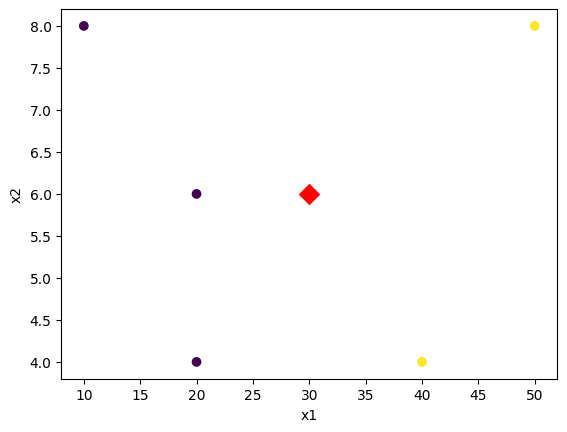

In [36]:
plt.scatter(X_train[:, 0],  X_train[:, 1], c=y_train) 
plt.scatter(X_test[:, 0],  X_test[:, 1], c='red', marker = 'D', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show() 

In [37]:
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_std = scalerX.transform(X_train)
print(X_train_std)

[[-1.22474487  1.11803399]
 [-0.54433105 -1.11803399]
 [-0.54433105  0.        ]
 [ 0.81649658 -1.11803399]
 [ 1.4969104   1.11803399]]


In [38]:
X_test_std = scalerX.transform(X_test)
print(X_test_std)

[[0.13608276 0.        ]]


In [39]:
knn = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [40]:
pred = knn.predict(X_test_std)
print(pred)

[0]


In [41]:
knn.predict_proba(X_test_std)

array([[0.66666667, 0.33333333]])

In [42]:
dist, index = knn.kneighbors(X_test_std)
print(dist)
print(index) 

[[0.68041382 1.30880211 1.30880211]]
[[2 1 3]]


In [43]:
#회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt 

In [44]:
 X_train = np.array([[10, 8],
           [20, 4],
           [20, 6],
           [40, 4],
           [50, 8]])
y_train = np.array([[100], [60], [50], [40], [100]])

In [45]:
 X_test = np.array([[30, 6]])

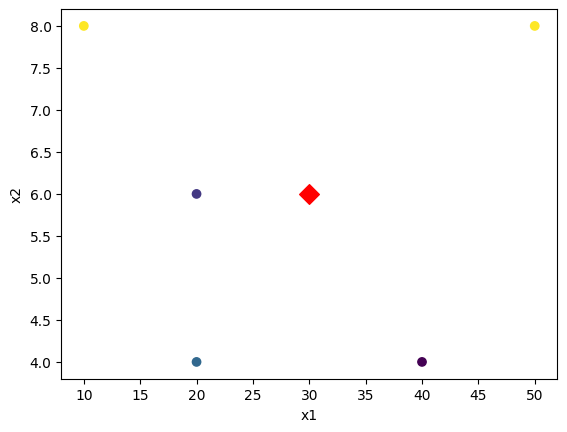

In [46]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train) 
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', marker = 'D', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show() 

In [47]:
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_std = scalerX.transform(X_train)
print(X_train_std)
scalerY = StandardScaler()
scalerY.fit(y_train)
y_train_std = scalerY.transform(y_train)
print(y_train_std)

[[-1.22474487  1.11803399]
 [-0.54433105 -1.11803399]
 [-0.54433105  0.        ]
 [ 0.81649658 -1.11803399]
 [ 1.4969104   1.11803399]]
[[ 1.18585412]
 [-0.39528471]
 [-0.79056942]
 [-1.18585412]
 [ 1.18585412]]


In [48]:
X_test_std = scalerX.transform(X_test)
print(X_test_std)

[[0.13608276 0.        ]]


In [49]:
knn = KNeighborsRegressor(n_neighbors = 3, metric='euclidean', weights="uniform")
knn.fit(X_train_std, y_train_std)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [50]:
y_pred = knn.predict(X_test_std)
print(y_pred)

[[-0.79056942]]


In [51]:
y_pred_inverse = scalerY.inverse_transform(y_pred)
print(y_pred_inverse)

[[50.]]
